<h1>Assignment 3 workbook</h1>
<p>M. Phillips</p>
<p>F. X</p>
<p>J. X</p>

In [1]:
import plate_parser as pp
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/applications.csv')
df

,plate,review_reason_code,customer_meaning,reviewer_comments,status
0,AZIZ714,2,LAST NAME,714 AREA CODE,N
1,BATBOX1,1,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,N
2,BBOMBS,2,NO MICRO AVAILABLE,BOMBS,N
3,BEACHY1,4,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,N
4,BLK PWR5,2,STRENGTH OF FAMILY,BLACK POWER,N
...,...,...,...,...,...
23458,4KTMGAL,1,TO TRAILER MY KTM BIKE,FORKED(FUCKED) MY GAL. SHE DOES HAVE A KTM M/C...,Y
23459,88 CAP,2,88 CAPITAL,"88=HATE SYMBOL, NO 88 CAR ON ANI",N
23460,BLNT 4C,2,"MY LAST NAME, BLUNT","BLUNT FORCE (TRAUMA) KILLS PEOPLE, HIS LAST NA...",N
23461,VIBRATR,1,"VIBRATOR, IT IS FOR A HARLEY DAVIDSON WITH RUB...","VIBRATOR, SEXUAL CONNOTATION",N


In [3]:
df.status.unique()

array(['N', 'Y', 'REMOVE', nan, '1', '?', 'H', 'R', 'M', 'T'],
      dtype=object)

In [4]:
# Remove resolutions that aren't Y/N
df = df[(df.status == 'Y') | (df.status == 'N')]
df = df.reset_index(drop=True)
df

,plate,review_reason_code,customer_meaning,reviewer_comments,status
0,AZIZ714,2,LAST NAME,714 AREA CODE,N
1,BATBOX1,1,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,N
2,BBOMBS,2,NO MICRO AVAILABLE,BOMBS,N
3,BEACHY1,4,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,N
4,BLK PWR5,2,STRENGTH OF FAMILY,BLACK POWER,N
...,...,...,...,...,...
23425,4KTMGAL,1,TO TRAILER MY KTM BIKE,FORKED(FUCKED) MY GAL. SHE DOES HAVE A KTM M/C...,Y
23426,88 CAP,2,88 CAPITAL,"88=HATE SYMBOL, NO 88 CAR ON ANI",N
23427,BLNT 4C,2,"MY LAST NAME, BLUNT","BLUNT FORCE (TRAUMA) KILLS PEOPLE, HIS LAST NA...",N
23428,VIBRATR,1,"VIBRATOR, IT IS FOR A HARLEY DAVIDSON WITH RUB...","VIBRATOR, SEXUAL CONNOTATION",N


In [5]:
df['Approved'] = 0

for i in range(len(df)):
    if df.loc[i, 'status'] == 'Y':
        df.loc[i, 'Approved'] = 1

df

,plate,review_reason_code,customer_meaning,reviewer_comments,status,Approved
0,AZIZ714,2,LAST NAME,714 AREA CODE,N,0
1,BATBOX1,1,BATMOBILE (BATMAN) PLUS SHAPE OF VEHICLE (SCIO...,BOX,N,0
2,BBOMBS,2,NO MICRO AVAILABLE,BOMBS,N,0
3,BEACHY1,4,LOVE THE BEACH,BEACHY LOOKS LIKE BITCHY 1,N,0
4,BLK PWR5,2,STRENGTH OF FAMILY,BLACK POWER,N,0
...,...,...,...,...,...,...
23425,4KTMGAL,1,TO TRAILER MY KTM BIKE,FORKED(FUCKED) MY GAL. SHE DOES HAVE A KTM M/C...,Y,1
23426,88 CAP,2,88 CAPITAL,"88=HATE SYMBOL, NO 88 CAR ON ANI",N,0
23427,BLNT 4C,2,"MY LAST NAME, BLUNT","BLUNT FORCE (TRAUMA) KILLS PEOPLE, HIS LAST NA...",N,0
23428,VIBRATR,1,"VIBRATOR, IT IS FOR A HARLEY DAVIDSON WITH RUB...","VIBRATOR, SEXUAL CONNOTATION",N,0


In [6]:
import plate_model as pm

A = pm.PlateModel('./data/applications.csv')
mf = pm.PlateModel.format_data(df)
mf

Initialising model...
Initialising complete


,Approved,Combination
0,0,202
1,0,2323
2,0,2323
3,0,14039
4,0,14873
...,...,...
485674,1,93676079
485675,1,4786369
485676,1,12833622823
485677,1,655732553


In [7]:
def get_permutations(plate):
    m = 2
    l = []
    
    while m <= len(plate):
        for i in range(0, len(plate) - m + 1):
            s = ''
            for j in range(0, m):
                s += plate[i+j]
            l.append(s)

        m += 1
    return l

In [8]:
app_map = {}
seen_map = {}

for i in range(len(df)):
    plate = df.loc[i, 'plate']
    approved = df.loc[i, 'Approved']

    perms = get_permutations(plate)
    for perm in perms:
        if perm not in app_map:
            app_map[perm] = 0
            seen_map[perm] = 0
        
        if approved == 1:
            app_map[perm] += 1
        seen_map[perm] += 1

# Sanity
print(len(app_map))
print(len(seen_map))

216290
216290


In [9]:
perc_map = {}
for key in app_map.keys():
    perc_map[key] = app_map[key]/seen_map[key]
perc_map

seg_df = pd.DataFrame.from_dict(perc_map, orient='index', columns=['Prob'])
seg_df = seg_df.sort_values(by='Prob')
seg_df.head(20)

,Prob
ANAMA,0.0
UNG XL,0.0
HUNG XL,0.0
UL 8,0.0
8FUL,0.0
FUL 8,0.0
H8FUL,0.0
8FUL 8,0.0
HUNG X,0.0
H8FUL 8,0.0


In [54]:
# Returns the longest known substring from each index location
def get_known_segments(str_in):
    segs = []
    percs = []
    
    for i in range(len(str_in) - 1):
        found = False
        t = str_in[i:]
        
        for j in range(1, len(str_in) - i):
            if t in perc_map:
                segs.append(t)
                percs.append(perc_map[t])
                found = True
                break
                
            t = str_in[i:-j]
    
        if not found:
            print('Couldnt find a match for: %s' % test[i:])

            # Assume equal probability to get through/blocked
            segs.append(str_in[i:])
            percs.append(0.5)
    
    return segs, percs

In [142]:
# Finds N character substrings strings and their acceptance probabilities
def alt_known_segments(str_in, length=3):
    segs = []
    percs = []

    for i in range(len(str_in) - (length-1)):
        t = str_in[i:i+3]
        segs.append(t)
        
        if t in perc_map:
            percs.append(perc_map[t])
        else:
            # Assume coin flip
            percs.append(0.5)

    # Plate is smaller than the window
    if len(percs) == 0:
        segs.append(str_in)
        
        if str_in in perc_map:
            percs.append(perc_map[str_in])
        else:
            # Assume coin flip
            percs.append(0.5)
    
    return segs, percs

In [56]:
# MAIN
seg_f = df.copy()
seg_f = seg_f[['plate', 'Approved']]

# There are maximum 12 characters
for i in range(13):
    seg_f[i] = 0.0

for i in range(len(seg_f)):
    lp = seg_f.loc[i, 'plate']
    s, p = get_known_segments(lp)

    col = 0
    for perc in p:
        seg_f.loc[i, col] = perc
        col += 1

seg_f

,plate,Approved,0,1,2,3,4,5,6,7,8,9,10,11,12
0,AZIZ714,0,0.0,0.0,0.0,0.250000,0.040000,0.205645,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,BATBOX1,0,0.0,0.0,0.0,0.000000,0.000000,0.113636,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,BBOMBS,0,0.0,0.0,0.0,0.000000,0.146067,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,BEACHY1,0,0.0,0.0,0.0,0.000000,0.000000,0.235849,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,BLK PWR5,0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.137931,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,1,1.0,1.0,1.0,1.000000,0.200000,0.193622,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
23426,88 CAP,0,0.0,0.0,0.0,0.000000,0.214286,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
23427,BLNT 4C,0,0.0,0.0,0.0,0.000000,0.000000,0.193548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
23428,VIBRATR,0,0.0,0.0,0.0,0.000000,0.289474,0.230453,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


666 ironically has a 0.666 (reoccuring) probability to be accepted

In [143]:
# ALT
seg_f = df.copy()
seg_f = seg_f[['plate', 'Approved']]

# There are maximum 12 characters
for i in range(13):
    seg_f[i] = 0.0

for i in range(len(seg_f)):
    lp = seg_f.loc[i, 'plate']
    s, p = alt_known_segments(lp)

    col = 0
    for perc in p:
        seg_f.loc[i, col] = perc
        col += 1

seg_f

,plate,Approved,0,1,2,3,4,5,6,7,8,9,10,11,12
0,AZIZ714,0,0.125000,0.500000,0.000000,0.166667,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BATBOX1,0,0.153846,0.400000,0.157895,0.172043,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BBOMBS,0,0.000000,0.075000,0.069444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BEACHY1,0,0.234375,0.312500,0.307692,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BLK PWR5,0,0.236842,0.204082,0.066667,0.000000,0.086957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,1,1.000000,0.200000,0.500000,0.250000,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23426,88 CAP,0,0.212121,0.625000,0.450980,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23427,BLNT 4C,0,0.333333,0.250000,0.188679,0.200000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23428,VIBRATR,0,0.166667,0.000000,0.238095,0.333333,0.289474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
cols = []
for i in range(13):
    cols.append(i)

X = seg_f[cols]
y = seg_f.Approved

In [145]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)
X_train.shape

(11715, 13)

In [146]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

In [147]:
print("Test accuracy for NB (no feature selection):", nb.fit(X_train, y_train).score(X_test, y_test))
print("Test accuracy for kNN (no feature selection):", knn.fit(X_train, y_train).score(X_test, y_test))

Test accuracy for NB (no feature selection): 0.8893725992317542
Test accuracy for kNN (no feature selection): 0.904310712761417


In [148]:
print('NB', metrics.classification_report(y_test, nb.predict(X_test)) )
print('knn', metrics.classification_report(y_test, knn.predict(X_test)) )

NB               precision    recall  f1-score   support

           0       0.89      0.99      0.93      9407
           1       0.91      0.48      0.63      2308

    accuracy                           0.89     11715
   macro avg       0.90      0.74      0.78     11715
weighted avg       0.89      0.89      0.88     11715

knn               precision    recall  f1-score   support

           0       0.93      0.95      0.94      9407
           1       0.77      0.73      0.75      2308

    accuracy                           0.90     11715
   macro avg       0.85      0.84      0.85     11715
weighted avg       0.90      0.90      0.90     11715



In [149]:
def test_a_plate(plate):       
    #s, p = get_known_segments(plate)
    s, p = alt_known_segments(plate)
    print(p)
    print(s)

    while len(p) < 13:
        p.append(0.0)

    fr = pd.DataFrame(p)
    fr = fr.T
    x = fr[cols]
    
    nres = nb.predict(x)
    knnr = knn.predict(x)

    print("NB prediction for %s: %i" % (plate, nres))
    print("KNN prediction for %s: %i" % (plate, knnr))

In [174]:
test_a_plate('WEASLEY')

[0.0, 0.2, 0.1, 0.25, 0.18181818181818182]
['WEA', 'EAS', 'ASL', 'SLE', 'LEY']
NB prediction for WEASLEY: 0
KNN prediction for WEASLEY: 0


/tmp/ipykernel_18634/11815.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("NB prediction for %s: %i" % (plate, nres))
/tmp/ipykernel_18634/11815.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("KNN prediction for %s: %i" % (plate, knnr))


In [10]:
A.build_model()

None


AttributeError: 'NoneType' object has no attribute 'Combinations'

In [6]:
inputs = df[['plate', 'review_reason_code', 'Approved']].copy()
inputs

,plate,review_reason_code,Approved
0,AZIZ714,2,0
1,BATBOX1,1,0
2,BBOMBS,2,0
3,BEACHY1,4,0
4,BLK PWR5,2,0
...,...,...,...
23425,4KTMGAL,1,1
23426,88 CAP,2,0
23427,BLNT 4C,2,0
23428,VIBRATR,1,0


In [7]:
inputs['PlateLen'] = 0

for i in range(len(df)):
    plate = inputs.loc[i, 'plate']
    inputs.loc[i, 'PlateLen'] = len(plate)

print(max(inputs.PlateLen))
print(min(inputs.PlateLen))
inputs

10
2


,plate,review_reason_code,Approved,PlateLen
0,AZIZ714,2,0,7
1,BATBOX1,1,0,7
2,BBOMBS,2,0,6
3,BEACHY1,4,0,7
4,BLK PWR5,2,0,8
...,...,...,...,...
23425,4KTMGAL,1,1,7
23426,88 CAP,2,0,6
23427,BLNT 4C,2,0,7
23428,VIBRATR,1,0,7


In [34]:
for i in range(max(inputs.PlateLen)):
    inputs[i] = 0
inputs

,plate,review_reason_code,Approved,PlateLen,0,1,2,3,4,5,6,7,8,9
0,AZIZ714,2,0,7,0,0,0,0,0,0,0,0,0,0
1,BATBOX1,1,0,7,0,0,0,0,0,0,0,0,0,0
2,BBOMBS,2,0,6,0,0,0,0,0,0,0,0,0,0
3,BEACHY1,4,0,7,0,0,0,0,0,0,0,0,0,0
4,BLK PWR5,2,0,8,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,1,1,7,0,0,0,0,0,0,0,0,0,0
23426,88 CAP,2,0,6,0,0,0,0,0,0,0,0,0,0
23427,BLNT 4C,2,0,7,0,0,0,0,0,0,0,0,0,0
23428,VIBRATR,1,0,7,0,0,0,0,0,0,0,0,0,0


In [35]:
# Change strings to ints
for i in range(len(inputs)):
    plate = inputs.loc[i, 'plate']
    
    for j in range(inputs.loc[i, 'PlateLen']):
        inputs.loc[i, j] = ord(plate[j])

inputs

,plate,review_reason_code,Approved,PlateLen,0,1,2,3,4,5,6,7,8,9
0,AZIZ714,2,0,7,65,90,73,90,55,49,52,0,0,0
1,BATBOX1,1,0,7,66,65,84,66,79,88,49,0,0,0
2,BBOMBS,2,0,6,66,66,79,77,66,83,0,0,0,0
3,BEACHY1,4,0,7,66,69,65,67,72,89,49,0,0,0
4,BLK PWR5,2,0,8,66,76,75,32,80,87,82,53,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,1,1,7,52,75,84,77,71,65,76,0,0,0
23426,88 CAP,2,0,6,56,56,32,67,65,80,0,0,0,0
23427,BLNT 4C,2,0,7,66,76,78,84,32,52,67,0,0,0
23428,VIBRATR,1,0,7,86,73,66,82,65,84,82,0,0,0


<Axes: xlabel='PlateLen', ylabel='Count'>

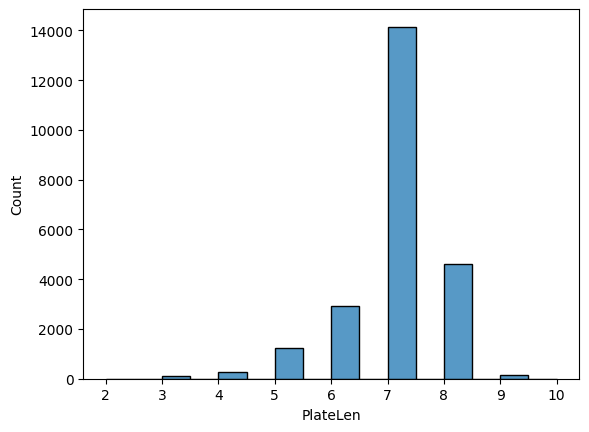

In [36]:
sns.histplot(inputs.PlateLen)

In [83]:
from sklearn.neighbors import KNeighborsClassifier

fields = []
for i in range(0, 10):
    fields.append(i)

X = inputs[fields]
y = inputs.Approved

knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [84]:
knn.score(X, y)

0.8545454545454545

In [85]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

# define model
model = DummyClassifier(strategy='most_frequent')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.801


In [86]:
# define model
model = DummyClassifier(strategy='uniform')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.505


In [87]:
# define model
model = DummyClassifier(strategy='stratified')
# fit model
model.fit(X, y)
# make predictions
yhat = model.predict(X)
# calculate accuracy
accuracy = accuracy_score(y, yhat)
print('Accuracy: %.3f' % accuracy)

Accuracy: 0.677


In [38]:
inputs['Predict'] = knn.predict(X)
inputs

,plate,review_reason_code,Approved,PlateLen,0,1,2,3,4,5,6,7,8,9,Predict
0,AZIZ714,2,0,7,65,90,73,90,55,49,52,0,0,0,0
1,BATBOX1,1,0,7,66,65,84,66,79,88,49,0,0,0,0
2,BBOMBS,2,0,6,66,66,79,77,66,83,0,0,0,0,0
3,BEACHY1,4,0,7,66,69,65,67,72,89,49,0,0,0,0
4,BLK PWR5,2,0,8,66,76,75,32,80,87,82,53,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,1,1,7,52,75,84,77,71,65,76,0,0,0,1
23426,88 CAP,2,0,6,56,56,32,67,65,80,0,0,0,0,0
23427,BLNT 4C,2,0,7,66,76,78,84,32,52,67,0,0,0,0
23428,VIBRATR,1,0,7,86,73,66,82,65,84,82,0,0,0,0


In [39]:
inputs[inputs.Approved != inputs.Predict]

,plate,review_reason_code,Approved,PlateLen,0,1,2,3,4,5,6,7,8,9,Predict
11,EGGPUTT,2,1,7,69,71,71,80,85,84,84,0,0,0,0
13,FJ 666,2,1,6,70,74,32,54,54,54,0,0,0,0,0
18,HVNNHEL,2,1,7,72,86,78,78,72,69,76,0,0,0,0
23,MMA515O,2,1,7,77,77,65,53,49,53,79,0,0,0,0
33,173D82D,2,1,7,49,55,51,68,56,50,68,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23392,PIXL8TD,2,1,7,80,73,88,76,56,84,68,0,0,0,0
23400,TRDBSTD,3,1,7,84,82,68,66,83,84,68,0,0,0,0
23407,5XCRAZY,2,1,7,53,88,67,82,65,90,89,0,0,0,0
23410,666XDVL,2,1,7,54,54,54,88,68,86,76,0,0,0,0


In [82]:
inputs[inputs.index == 5173]

,plate,review_reason_code,Approved,PlateLen,0,1,2,3,4,5,6,7,8,9,Predict
5173,DIX ZIP,1,0,7,68,73,88,32,90,73,80,0,0,0,0


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(y_pred)
print(X_test)
print(X_train)
print(y_train)

#gnb.score(X_test, y_test)

[0 0 0 ... 1 1 0]
              0         1         2         3         4         5    6    7  \
10891  0.217391  0.000000  0.142857  0.176471  0.000000  0.000000  0.0  0.0   
5173   0.200000  0.000000  0.000000  0.600000  0.000000  0.000000  0.0  0.0   
20113  0.230769  0.176471  0.333333  0.111111  0.224490  0.000000  0.0  0.0   
8487   0.000000  0.000000  0.500000  0.281250  0.166667  0.000000  0.0  0.0   
4658   0.545455  0.307692  0.250000  0.178571  0.000000  0.066667  0.0  0.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
9107   0.037383  0.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0   
22739  0.157895  0.090909  0.166667  0.181818  0.272727  0.280702  0.0  0.0   
17641  0.444444  1.000000  0.333333  0.800000  0.307692  0.000000  0.0  0.0   
7341   0.230769  1.000000  1.000000  1.000000  0.144509  0.000000  0.0  0.0   
6840   0.175439  0.112069  0.125000  0.333333  0.189189  0.000000  0.0  0.0   

         8    9   10   11   12  


In [177]:
test_data = pd.DataFrame({'plate': ['NICEBOY', 'FCKYOU', 'FCK', 'TAKAHIK', 'DAISY', 'STALIN', 'AMERICA', '666x666', 'LEGOLAS', 'XLEGOLASX', '69YOLO', 'FKU']})
test_data

for i in range(0, 10):
    test_data[i] = 0

for i in range(len(test_data)):
    word = test_data.loc[i, 'plate']

    for j in range(len(word)):
        test_data.loc[i, j] = ord(word[j])

labs = []
for i in range(10):
    labs.append(i)

t = test_data[labs]
test_data['NB-Predict'] = gnb.fit(X_train, y_train).predict(t)
test_data

ValueError: X has 10 features, but GaussianNB is expecting 13 features as input.

In [178]:
test_data['kNN-Predict'] = knn.predict(t)
test_data

ValueError: X has 10 features, but KNeighborsClassifier is expecting 13 features as input.

In [106]:
def is_prime(num):
    if num < 2:
        return False
    for i in range(2, int(num*0.5) + 1):
        if num % i == 0:
            return False
    return True

def get_n_primes(n):
    primes = []
    i = 2

    while len(primes) != n:
        if is_prime(i):
            primes.append(i)
        i += 1

    return primes    

In [128]:
# Mapping to primes guarentees products are unique
alpha_map = {}
alpha = list(map(chr, range(ord('A'), ord('Z') + 1)))
alpha.extend(list(map(chr, range(ord('0'), ord('9') + 1))))
alpha.append(' ')
alpha.append('$')
alpha.append('&')
alpha.append('#')
alpha.append('-')

# We don't expect to see these but include them for sanity
alpha.extend(list(map(chr, range(ord('a'), ord('z') + 1))))
n = len(alpha)
primes = get_n_primes(n)

for i in range(len(alpha)):
    alpha_map[alpha[i]] = primes[i]

alpha_map

{'A': 2,
 'B': 3,
 'C': 5,
 'D': 7,
 'E': 11,
 'F': 13,
 'G': 17,
 'H': 19,
 'I': 23,
 'J': 29,
 'K': 31,
 'L': 37,
 'M': 41,
 'N': 43,
 'O': 47,
 'P': 53,
 'Q': 59,
 'R': 61,
 'S': 67,
 'T': 71,
 'U': 73,
 'V': 79,
 'W': 83,
 'X': 89,
 'Y': 97,
 'Z': 101,
 '0': 103,
 '1': 107,
 '2': 109,
 '3': 113,
 '4': 127,
 '5': 131,
 '6': 137,
 '7': 139,
 '8': 149,
 '9': 151,
 ' ': 157,
 '$': 163,
 '&': 167,
 '#': 173,
 '-': 179,
 'a': 181,
 'b': 191,
 'c': 193,
 'd': 197,
 'e': 199,
 'f': 211,
 'g': 223,
 'h': 227,
 'i': 229,
 'j': 233,
 'k': 239,
 'l': 241,
 'm': 251,
 'n': 257,
 'o': 263,
 'p': 269,
 'q': 271,
 'r': 277,
 's': 281,
 't': 283,
 'u': 293,
 'v': 307,
 'w': 311,
 'x': 313,
 'y': 317,
 'z': 331}

In [140]:
pairs = inputs[['plate', 'PlateLen', 'Approved']].copy()

for i in range(9):
    pairs[i] = 0

for i in range(len(pairs)):
    plate = pairs.loc[i, 'plate']

    for j in range(0, len(plate)-1):
        c_one = plate[j]
        c_two = plate[j+1]

        if c_one not in alpha_map or c_two not in alpha_map:
            continue
        
        pairs.loc[i, j] = alpha_map[c_one] * alpha_map[c_two]

pairs

,plate,PlateLen,Approved,0,1,2,3,4,5,6,7,8
0,AZIZ714,7,0,202,2323,2323,14039,14873,13589,0,0,0
1,BATBOX1,7,0,6,142,213,141,4183,9523,0,0,0
2,BBOMBS,6,0,9,141,1927,123,201,0,0,0,0
3,BEACHY1,7,0,33,22,10,95,1843,10379,0,0,0
4,BLK PWR5,8,0,111,1147,4867,8321,4399,5063,7991,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23425,4KTMGAL,7,1,3937,2201,2911,697,34,74,0,0,0
23426,88 CAP,6,0,22201,23393,785,10,106,0,0,0,0
23427,BLNT 4C,7,0,111,1591,3053,11147,19939,635,0,0,0
23428,VIBRATR,7,0,1817,69,183,122,142,4331,0,0,0


In [135]:
fields = []
for i in range(9):
    fields.append(i)

X = pairs[fields]
y = pairs.Approved

knn = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
knn.fit(X, y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [136]:
knn.score(X, y)

0.8519419547588561

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

print(y_pred)
print(X_test)
print(X_train)
print(y_train)

[0 0 0 ... 0 0 0]
          0     1      2      3      4      5     6  7  8
10891    26  2041   3611    989    215      0     0  0  0
5173    161  2047  13973  15857   2323   1219     0  0  0
20113  1909   989    215    335   4757   4331     0  0  0
8487   3151  5891   2623    122     86   3053     0  0  0
4658    143   121    407   2257   9577  11461  3869  0  0
...     ...   ...    ...    ...    ...    ...   ... .. ..
9107   1927   141      0      0      0      0     0  0  0
22739   671    22    106   2279   6751  20567  6157  0  0
17641  2923  5293   7303   7303   2077    713     0  0  0
7341   1927    82    326  25591  16799  13589     0  0  0
6840    141  2021    473     77     14     14     0  0  0

[11715 rows x 9 columns]
           0      1     2      3      4      5      6  7  8
19624    142     62    62     38    437    713      0  0  0
10209  18769  21509  6437   1927   2021   2021      0  0  0
9508    1147   2257  9577  15857   3737   3959      0  0  0
20000  12091  13589 

In [141]:
test_data = pd.DataFrame({'plate': ['NICEBOY', 'FCKYOU', 'FCK', '1818', 'TAKAHIK', 'DAISY', 'GWBUSH', 'STALIN', 'AMERICA', '666x666', 'LEGOLAS', 'XLEGOLASX', '69YOLO', 'FKU']})
test_data

for i in range(9):
    test_data[i] = 0

for i in range(len(test_data)):
    word = test_data.loc[i, 'plate']

    for j in range(0, len(word)-1):
        c_one = word[j]
        c_two = word[j+1]

        if c_one not in alpha_map or c_two not in alpha_map:
            continue
        
        test_data.loc[i, j] = alpha_map[c_one] * alpha_map[c_two]

labs = []
for i in range(9):
    labs.append(i)

t = test_data[labs]
test_data['NB-Predict'] = gnb.fit(X_train, y_train).predict(t)
test_data

,plate,0,1,2,3,4,5,6,7,8,NB-Predict
0,NICEBOY,989,115,55,33,141,4559,0,0,0,0
1,FCKYOU,65,155,3007,4559,3431,0,0,0,0,0
2,FCK,65,155,0,0,0,0,0,0,0,0
3,ADOLF,14,329,1739,481,0,0,0,0,0,0
4,18FAN,15943,1937,26,86,0,0,0,0,0,0
5,TAKAHIK,142,62,62,38,437,713,0,0,0,0
6,DAISY,14,46,1541,6499,0,0,0,0,0,0
7,GWBUSH,1411,249,219,4891,1273,0,0,0,0,0
8,STALIN,4757,142,74,851,989,0,0,0,0,0
9,AMERICA,82,451,671,1403,115,10,0,0,0,0


In [142]:
gnb.score(X, y)

0.7991890738369611